# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

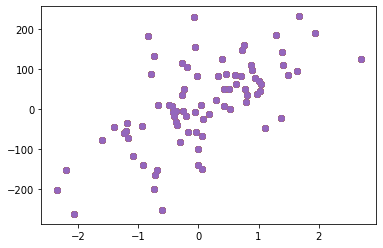

In [9]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(5):
  plt.scatter(X_train[:,1],y_train)

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [17]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(5, input_shape=[5],activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error',optimizer = tf.keras.optimizers.SGD(0.001))

history =model.fit(X_train,y_train,epochs=50,validation_split = 0.2,verbose=2)

predictions = model.predict(X_test)



Epoch 1/50
2/2 - 0s - loss: 12595.1211 - val_loss: 7105.0293 - 376ms/epoch - 188ms/step
Epoch 2/50
2/2 - 0s - loss: 12493.4629 - val_loss: 6986.0254 - 31ms/epoch - 15ms/step
Epoch 3/50
2/2 - 0s - loss: 12305.8096 - val_loss: 6638.4692 - 28ms/epoch - 14ms/step
Epoch 4/50
2/2 - 0s - loss: 11768.4678 - val_loss: 5443.2119 - 26ms/epoch - 13ms/step
Epoch 5/50
2/2 - 0s - loss: 9884.6143 - val_loss: 2481.9995 - 29ms/epoch - 14ms/step
Epoch 6/50
2/2 - 0s - loss: 6708.6484 - val_loss: 1764.6349 - 29ms/epoch - 14ms/step
Epoch 7/50
2/2 - 0s - loss: 5522.7959 - val_loss: 1026.0281 - 27ms/epoch - 14ms/step
Epoch 8/50
2/2 - 0s - loss: 3476.7974 - val_loss: 345.5950 - 31ms/epoch - 16ms/step
Epoch 9/50
2/2 - 0s - loss: 1931.5564 - val_loss: 2789.9556 - 30ms/epoch - 15ms/step
Epoch 10/50
2/2 - 0s - loss: 4586.5854 - val_loss: 2540.1018 - 33ms/epoch - 17ms/step
Epoch 11/50
2/2 - 0s - loss: 2732.6621 - val_loss: 132.4862 - 32ms/epoch - 16ms/step
Epoch 12/50
2/2 - 0s - loss: 199.2516 - val_loss: 298.1092 

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

Text(0, 0.5, 'Loss')

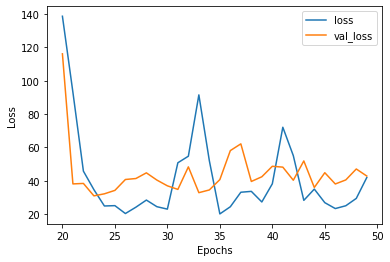

In [20]:
# Your code here
history_df = pd.DataFrame(history.history)
history_df.loc[20:, ['loss', 'val_loss']].plot();
plt.xlabel('Epochs')
plt.ylabel('Loss')

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [22]:
# Insert the function for R2 Score
import numpy as np
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
accu = r2_score(y_test, y_pred) 
print("Accuracy:", accu)

Accuracy: 0.9949060115054705


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [29]:
# Your code here
model_custom = keras.Sequential([keras.layers.Dense(64,input_dim=5,activation='relu'),
                                 keras.layers.Dense(15,activation='relu'),
                                 keras.layers.Dense(10,activation='relu'), #hidden
                                 keras.layers.Dense(1)]) #OUTPUT
model_custom.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                     loss='mean_absolute_error')
history_custom = model_custom.fit(
    X_train,y_train,
    validation_split =0.2,
    verbose=2,epochs=150
)

Epoch 1/150
2/2 - 0s - loss: 89.0932 - val_loss: 72.4327 - 494ms/epoch - 247ms/step
Epoch 2/150
2/2 - 0s - loss: 89.0751 - val_loss: 72.4217 - 30ms/epoch - 15ms/step
Epoch 3/150
2/2 - 0s - loss: 89.0600 - val_loss: 72.4100 - 29ms/epoch - 15ms/step
Epoch 4/150
2/2 - 0s - loss: 89.0462 - val_loss: 72.4003 - 32ms/epoch - 16ms/step
Epoch 5/150
2/2 - 0s - loss: 89.0327 - val_loss: 72.3899 - 30ms/epoch - 15ms/step
Epoch 6/150
2/2 - 0s - loss: 89.0202 - val_loss: 72.3787 - 31ms/epoch - 16ms/step
Epoch 7/150
2/2 - 0s - loss: 89.0067 - val_loss: 72.3672 - 32ms/epoch - 16ms/step
Epoch 8/150
2/2 - 0s - loss: 88.9936 - val_loss: 72.3542 - 31ms/epoch - 15ms/step
Epoch 9/150
2/2 - 0s - loss: 88.9793 - val_loss: 72.3410 - 27ms/epoch - 14ms/step
Epoch 10/150
2/2 - 0s - loss: 88.9657 - val_loss: 72.3280 - 25ms/epoch - 13ms/step
Epoch 11/150
2/2 - 0s - loss: 88.9514 - val_loss: 72.3137 - 28ms/epoch - 14ms/step
Epoch 12/150
2/2 - 0s - loss: 88.9365 - val_loss: 72.2986 - 27ms/epoch - 14ms/step
Epoch 13/15

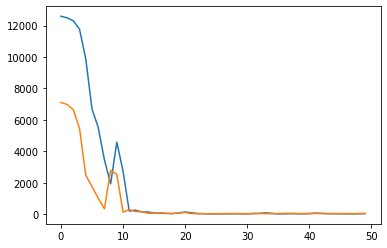

In [31]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

In [32]:
preds=model.predict(X_test)
r2_score(y_test,preds.squeeze())

0.9949060115054705